# WHO Suicide Statistics

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Read data

In [11]:
df = pd.read_csv('/home/ml-engineer/Documents/Dataset/who-suicide-statistics/who_suicide_statistics.csv')

check the dimension

In [12]:
df.shape

(43776, 6)

check data types

In [13]:
df.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

add month and date to change date type

In [14]:
df.year = df.year.apply(lambda x: str(x) + "-01-01")
df.year = pd.to_datetime(df.year, format = '%Y/%m/%d')

In [15]:
df.dtypes

country                object
year           datetime64[ns]
sex                    object
age                    object
suicides_no           float64
population            float64
dtype: object

preview first 5 rows

In [16]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985-01-01,female,15-24 years,NaN,277900.0
1,Albania,1985-01-01,female,25-34 years,NaN,246800.0
2,Albania,1985-01-01,female,35-54 years,NaN,267500.0
3,Albania,1985-01-01,female,5-14 years,NaN,298300.0
4,Albania,1985-01-01,female,55-74 years,NaN,138700.0


get summary of the data

In [17]:
df.describe()

,suicides_no,population
count,41520.000000,3.831600e+04
mean,193.315390,1.664091e+06
std,800.589926,3.647231e+06
min,0.000000,2.590000e+02
25%,1.000000,8.511275e+04
50%,14.000000,3.806550e+05
75%,91.000000,1.305698e+06
max,22338.000000,4.380521e+07


How many missing values over features

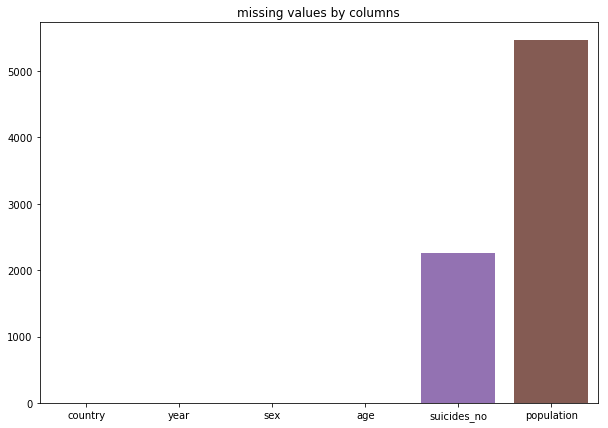

In [33]:
plt.figure(figsize=(10, 7))
sns_plot = sns.barplot(x = df.isnull().sum().index, y = df.isnull().sum()).set_title("missing values by columns")
sns_plot.figure.set_figure("missing_values_by_columns.jpg")

Records each year

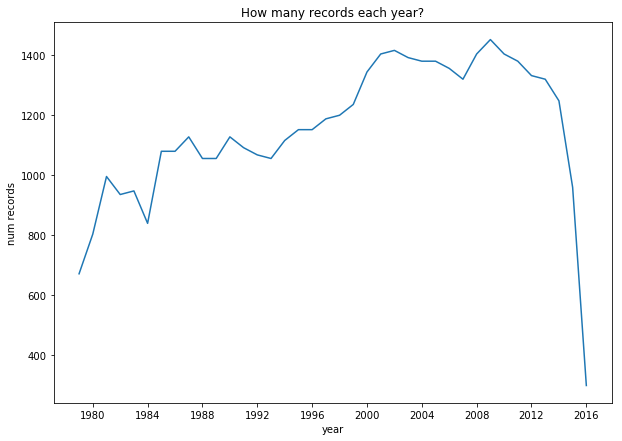

In [48]:
plt.figure(figsize=(10, 7))
year_count = df.year.value_counts()
year_count = year_count.reset_index()
year_count.columns = ["year", "num records"]
year_count = year_count.sort_values(by = 'year')
sns_plot = sns.lineplot(x = year_count['year'], y = year_count['num records']).set_title("How many records each year?")
sns_plot.figure.savefig("records_each_year.jpg")

How many missing values over time

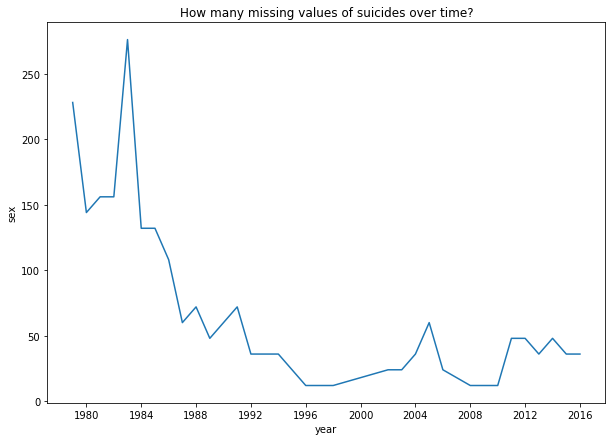

In [34]:
df_null = df[df.suicides_no.isnull()]
plt.figure(figsize=(10, 7))
sns_plot = sns.lineplot(x = df_null.groupby('year')['suicides_no'].count().index, y = df_null.groupby('year')['sex'].count()).set_title("How many missing values of suicides over time?")
sns_plot.figure.savefig("missing_over_time.jpg")

Which countries that the data is most missing

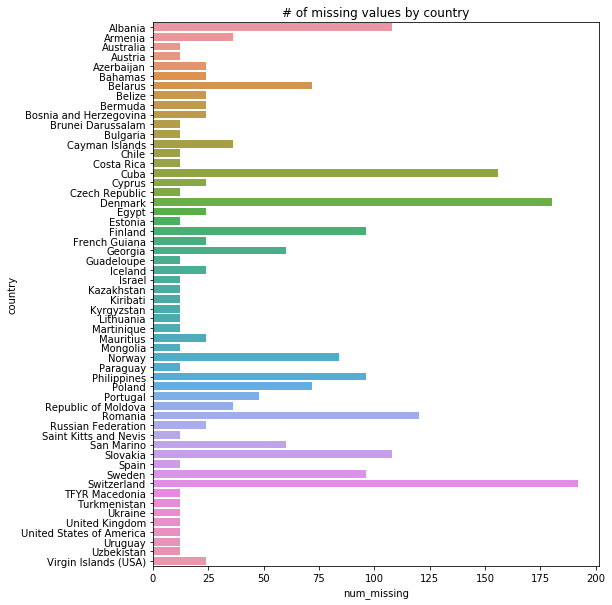

In [29]:
plt.figure(figsize=(8, 10))
df_suicide_null = df[df.suicides_no.isnull()]
df_suicide_groupby = df_suicide_null.groupby('country')['year'].count()
df_suicide_groupby = df_suicide_groupby.reset_index()
df_suicide_groupby.columns = ["country", "num_missing"]
sns_plot = sns.barplot(y = 'country' , x = 'num_missing', data = df_suicide_groupby).set_title("# of missing values by country")
sns_plot.figure.savefig("num_missing_value_by_country.jpg")

## Exploratory

Which Gender do suicide the most

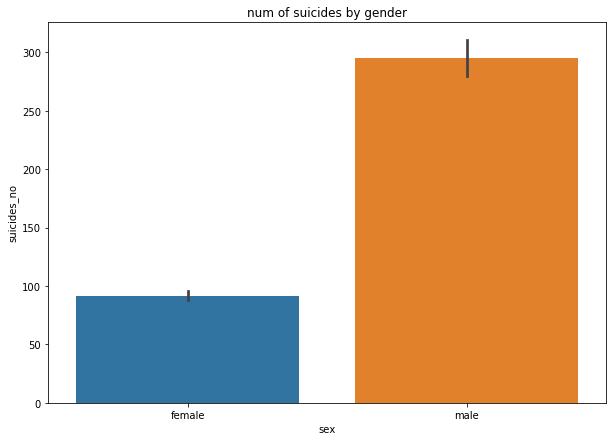

In [28]:
plt.figure(figsize=(10, 7))
sns_plot = sns.barplot(x = 'sex', y = 'suicides_no', data = df).set_title("num of suicides by gender")
sns_plot.figure.savefig('suicides_by_gender.jpg')

Number of suicides over the year

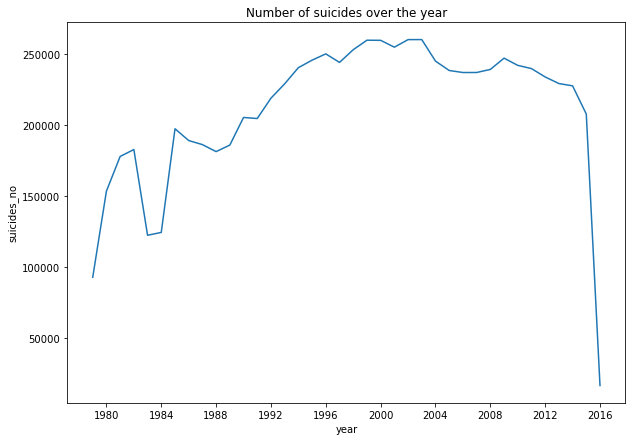

In [27]:
plt.figure(figsize=(10, 7))
df_year_over_suicides = df.groupby('year')['suicides_no'].sum()
df_year_over_suicides = df_year_over_suicides.reset_index()
sns_plot = sns.lineplot(x = 'year', y = 'suicides_no', data = df_year_over_suicides).set_title("Number of suicides over the year")
sns_plot.figure.savefig("num_suicides_over_year.jpg")

In [ ]:
countries = list(df_suicide_groupby[df_suicide_groupby['num_missing'] == 12]['country'])

In [ ]:
df_clean = df[df['country'].isin(countries)]

In [ ]:
df_clean_na = df_clean[df_clean.suicides_no.isnull()]

In [ ]:
df_clean_na.groupby('country')['year'].count()

In [ ]:
df_clean_na